In [2]:
import pandas as pd

benin = pd.read_csv('../data/benin_clean.csv', parse_dates=['Timestamp'])
sierra_leone = pd.read_csv('../data/sierraleone_clean.csv', parse_dates=['Timestamp'])
togo = pd.read_csv('../data/togo_clean.csv', parse_dates=['Timestamp'])

In [4]:
# Add a country column for easier plotting
benin['Country'] = 'Benin'
sierra_leone['Country'] = 'SierraLeone'
togo['Country'] = 'Togo'

# Combine all into one DataFrame
df_all = pd.concat([benin, sierra_leone, togo], ignore_index=True)

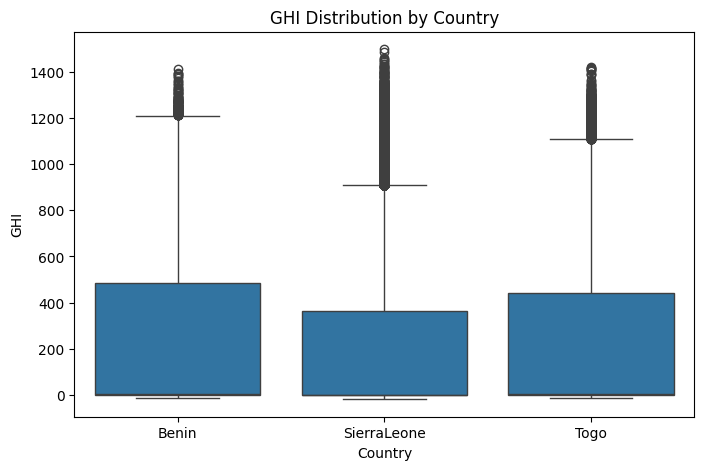

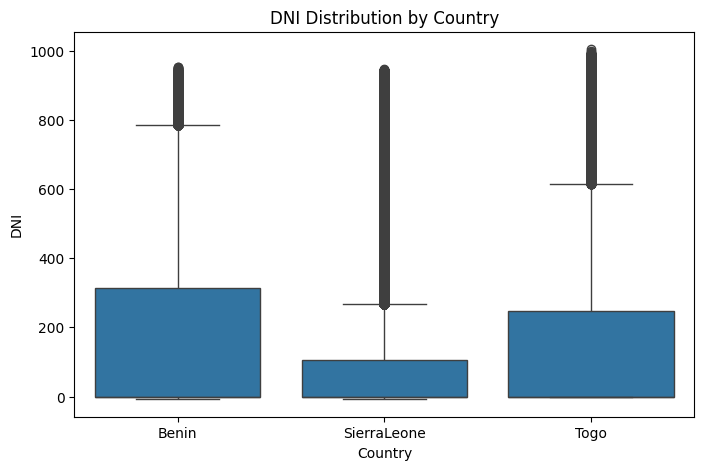

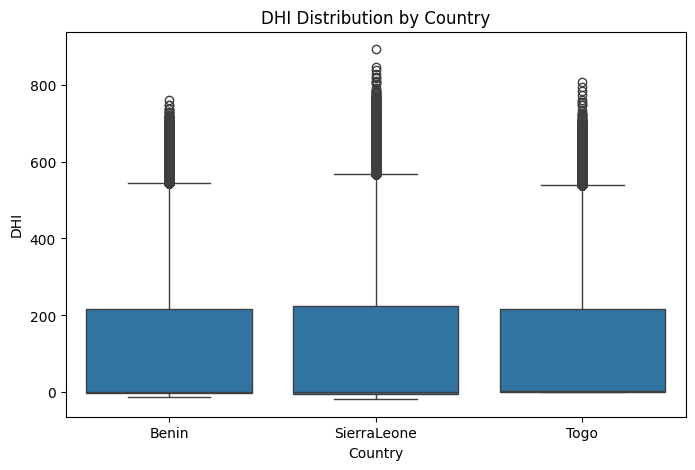

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Country', y=metric, data=df_all)
    plt.title(f'{metric} Distribution by Country')
    plt.show()

In [6]:
summary_stats = df_all.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary_stats

GHI                    DNI                    DHI         \
               mean median     std    mean median     std    mean median   
Country                                                                    
Benin        240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
SierraLeone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo         230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                     
                std  
Country              
Benin        158.69  
SierraLeone  158.95  
Togo         156.52

In [7]:
from scipy.stats import f_oneway

ghi_anova = f_oneway(
    benin['GHI'],
    sierra_leone['GHI'],
    togo['GHI']
)

print(f'ANOVA test for GHI: F={ghi_anova.statistic:.2f}, p={ghi_anova.pvalue:.4f}')

ANOVA test for GHI: F=2090.09, p=0.0000


### Key Observations

- **Benin** has the highest average values for both GHI and DNI, along with the greatest variability, indicating strong solar potential but also high fluctuations throughout the year.
- **Sierra Leone** shows the lowest solar irradiance across all metrics, yet has the most consistent (least variable) solar profile—potentially ideal for applications that require stable input.
- **Togo** offers a balanced profile with moderately high irradiance and moderate variability, making it a reliable candidate for scalable solar investments with lower risk than Benin.

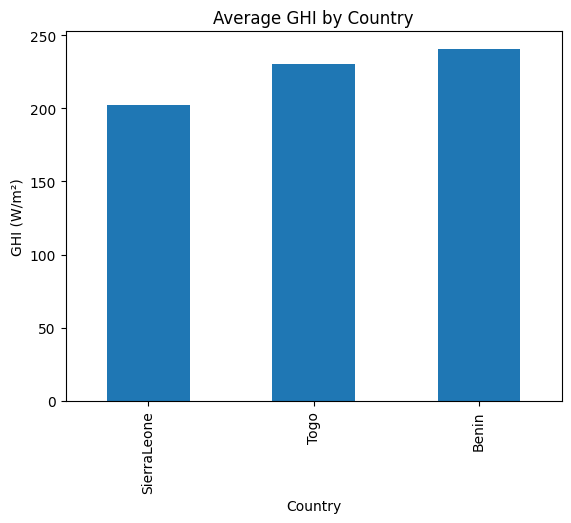

In [11]:
avg_ghi = df_all.groupby('Country')['GHI'].mean().sort_values()
avg_ghi.plot(kind='bar', title='Average GHI by Country', ylabel='GHI (W/m²)')
plt.show()